In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [20]:
df_train = pd.read_csv('../raw/train.csv')

In [39]:
products = pd.read_csv('../raw/producto_tabla.csv')

In [21]:
df_train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3


            Semana  Demanda_uni_equil
count  1799.000000        1799.000000
mean      6.063369          56.036822
std       1.888843         210.407829
min       1.000000           0.000000
25%       7.000000           3.534651
50%       7.000000           9.003126
75%       7.000000          31.118622
max       7.000000        2950.000000


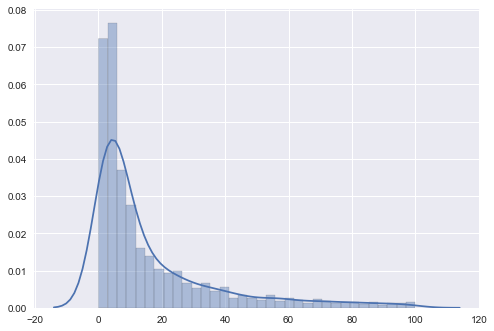

In [22]:
byproduct = df_train.groupby('Producto_ID').agg({'Demanda_uni_equil': 'mean',
                                                 'Semana' : lambda x: len(x.unique())})
print(byproduct.describe())

demand_by_prod = byproduct.query('Demanda_uni_equil < 100')['Demanda_uni_equil'].tolist()
sns.distplot(demand_by_prod)

* More than 75% of items are sold in each week (ie sales in 7 weeks)
* Demand for most items is low (50% of product/week/store/channel combinations have demand of <10).
* There is an extremely long tail

In [46]:
p = byproduct.query('Demanda_uni_equil == 2950').index.values[0]
products[products.Producto_ID == p]

,Producto_ID,NombreProducto
689,31668,Sand Bco Jamon sn Chil PPlus 86g MTA LON 31668
